# L2: Introduction to PyTorch Tensors 

### Goals of this lecture

- Getting to know tensors
- Getting to know basic tensor operations
- Getting to know tensor views
- Understanding datatypes of tensors

## Tensors

What's a tensor?

Tensors are specialized data structures similar to arrays, vectors and matrices.

- Vector - 1-D list of numbers 

In [1]:
vec1 = [1,2,3]

In [2]:
import numpy as np

vec2 = np.array(vec1)

### Note that numpy arrays and python lists are not the same thing!

Primary difference: **Performance**

In [10]:
import time
import numpy as np

size_of_vec = 1000000

def pure_python_version():
    t1 = time.time()
    X = range(size_of_vec)
    Y = range(size_of_vec)
    Z = [X[i] + Y[i] for i in range(len(X)) ]
    return time.time() - t1

def numpy_version():
    t1 = time.time()
    X = np.arange(size_of_vec)
    Y = np.arange(size_of_vec)
    Z = X + Y
    return time.time() - t1


t1 = pure_python_version()
t2 = numpy_version()
print(t1, t2)
print("Numpy is in this example " + str(t1/t2) + " faster!")

1.2297956943511963 0.0534365177154541
Numpy is in this example 23.01414364049275 faster!


Tensors are specialized data structures similar to arrays and matrices.

- Vector - 1-D list of numbers 

- Matrix - 2-D list of numbers

In [11]:
import sys

matrix = np.array([[0, 0, 0],
                   [0, 1, 0],
                   [3, 0, 0]])

In [12]:
print(matrix)

[[0 0 0]
 [0 1 0]
 [3 0 0]]


Tensors are specialized data structures similar to arrays and matrices.

- Vector - 1-D list of numbers 
- Matrix - 2-D list of numbers

- Tensor - **N**-D list of numbers

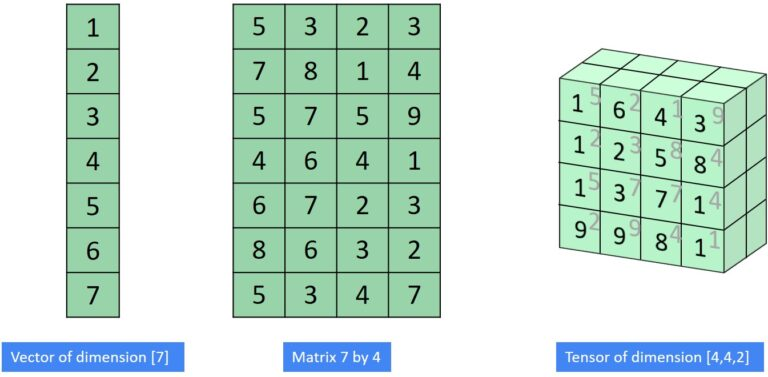

We refer to anything which has three or more dimensions as a tensor rather than a matrix.

The torch library offers a tensor data structure specifically designed for machine learning applications!

In [13]:
# Initialization from data
import torch
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
print(x_data)

tensor([[1, 2],
        [3, 4]])


In [14]:
# Initialization from NumPy array

np_array = np.array(data)
x_np = torch.from_numpy(np_array)
print(x_np)

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)


In [20]:
# Initialization from another tensor

x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")


Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.2696, 0.0706],
        [0.3348, 0.1819]]) 



In [21]:
shape = (2,3,4,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[[0.1074, 0.1428, 0.2326, 0.8573],
         [0.7796, 0.9805, 0.8763, 0.7421],
         [0.4916, 0.8724, 0.6037, 0.4033]],

        [[0.3460, 0.1540, 0.4188, 0.3568],
         [0.7510, 0.4356, 0.1934, 0.4212],
         [0.6160, 0.4746, 0.0816, 0.1662]]]) 

Ones Tensor: 
 tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]]) 

Zeros Tensor: 
 tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])


### Tensor Attributes

Important: Tensor data structure has many attributes which can be exploited for debugging

In [22]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## Basic Tensor Operations

Tensors can be manipulated in a similar manner to NumPy arrays: 

In [52]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


Indexing order:

In [53]:
tensor = torch.randn((2,2))
print(tensor)

tensor([[-1.5810,  2.2749],
        [-0.4581,  0.6643]])


In [54]:
print(tensor[1,0])

tensor(-0.4581)


## Basic Tensor Operations

Same idea as with NumPy arrays/matrices

In [55]:
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[2.4996, 5.1750],
        [0.2099, 0.4413]]) 

tensor * tensor 
 tensor([[2.4996, 5.1750],
        [0.2099, 0.4413]])


In [56]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[7.6746, 2.2355],
        [2.2355, 0.6512]]) 

tensor @ tensor.T 
 tensor([[7.6746, 2.2355],
        [2.2355, 0.6512]])


### Elementwise operations

Many functions can be applied on a tensor element by element
- torch.cos
- torch.sin
- torch.exp
- torch.log

These functions return a new tensor with the function being applied to each element in the tensor

In [57]:
import torch
a = torch.ones([4,4])
b = torch.log(a)
print(a)
print(b)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


### In-place operations

Operations that have a ```_``` suffix are in-place. For example: ```x.copy_(y)```, ```x.t_()```, ```x.exp_()```, will change ```x```.

In [58]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[-1.5810,  2.2749],
        [-0.4581,  0.6643]]) 

tensor([[3.4190, 7.2749],
        [4.5419, 5.6643]])


### Interaction with NumPy

You'll likely need to convert between a NumPy array (usually when plotting data/results). 


In [59]:
# Convert from tensor to NumPy array

tensor = torch.ones(4, 4)
print(tensor)
print(tensor.numpy())

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [60]:
# Covert from NumPy array to torch:

n = np.ones(5)
t = torch.from_numpy(n)
print(t)

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


Cool thing is that changes in NumPy array are reflected in the tensor!

In [61]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


### Combining Tensors

We can concatenate tensors along different dimensions

In [63]:
import torch
a = torch.randn(2,3)
b = torch.cat((a,a,a),0)
c = torch.cat((a,a,a),1)

In [64]:
print(a)
print(b)
print(c)

tensor([[ 1.1602, -0.8617, -0.9452],
        [-1.4749,  0.0369,  0.5200]])
tensor([[ 1.1602, -0.8617, -0.9452],
        [-1.4749,  0.0369,  0.5200],
        [ 1.1602, -0.8617, -0.9452],
        [-1.4749,  0.0369,  0.5200],
        [ 1.1602, -0.8617, -0.9452],
        [-1.4749,  0.0369,  0.5200]])
tensor([[ 1.1602, -0.8617, -0.9452,  1.1602, -0.8617, -0.9452,  1.1602, -0.8617,
         -0.9452],
        [-1.4749,  0.0369,  0.5200, -1.4749,  0.0369,  0.5200, -1.4749,  0.0369,
          0.5200]])


### Adding dimensions

We can also add dimensions if we need them

In [65]:
import torch
a = torch.randn(2,3)
b = a.unsqueeze(0)

In [66]:
print(a.shape)
print(b.shape)

torch.Size([2, 3])
torch.Size([1, 2, 3])


## Datatypes of tensors

Recall different datatypes from ECE 220

- 8-bit signed integer (char): torch.int8
- 8-bit unsigned integer (unsigned char): torch.uint8
- 32-bit signed integer (int): torch.int32
- 32-bit floating point (float): torch.float (or torch.float32)
- 64-bit floating point (double): torch.double (or torch.float64)

In [67]:
import torch
print(torch.zeros([2, 4], dtype=torch.int32))
print(torch.ones([2, 4], dtype=torch.float64))

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.int32)
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


How much memory do those tensors consume (roughly)?

**It is important to roughly keep track of how much memory your machine learning/artificial intelligence application uses because GPU memory is often a main limitation**

### Converting from one datatype to another

Use the ```Tensor.to(...)``` function but keep in mind possible loss of bits

In [68]:
x = torch.ones((2,4), dtype=torch.int32)
print(x)
y = x.to(torch.float64)
print(y)

tensor([[1, 1, 1, 1],
        [1, 1, 1, 1]], dtype=torch.int32)
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


## Tensor Views

Imagine we want to access part of a tensor (e.g., first row) or we want to permute rows and columns. Do we really need to allocate new memory to store this part of the tensor?

No:
- a tensor can be a "view" of an existing tensor
- a "view" of a tensor shares the data with the original tensor

In [76]:
t = torch.rand(4, 4)
b = t.view(2, 8) #c = t.view(2, 8).clone()
print(t.storage().data_ptr() == b.storage().data_ptr())
print(t)
print(b)
print(t.dtype)
b[0,0] = 0
print(t)

True
tensor([[0.3656, 0.8639, 0.7144, 0.2836],
        [0.3406, 0.4377, 0.8508, 0.2209],
        [0.8350, 0.3343, 0.9630, 0.7136],
        [0.3651, 0.0031, 0.3029, 0.0287]])
tensor([[0.3656, 0.8639, 0.7144, 0.2836, 0.3406, 0.4377, 0.8508, 0.2209],
        [0.8350, 0.3343, 0.9630, 0.7136, 0.3651, 0.0031, 0.3029, 0.0287]])
torch.float32


How much memory does ```t``` and ```b``` consume?

## Next Lecture: more about views and storage